# Test API Deployment
## 1. Accessing API

In [1]:
import requests
import pandas as pd

new_data = {
  "Age": 25,
  "KM": 10000,
  "FuelType": "Diesel",
  "HP": 110,
  "MetColor": 1,
  "Automatic": 1,
  "CC": 4000,
  "Doors": 4,
  "Weight": 1110
}

In [2]:
resp = requests.post("http://127.0.0.1/api/v1/used-car/price", json = new_data)
print("Predicted Price: ", resp.json()["price"])

Predicted Price:  8878.829091562038


## 2. Explore Predictions
### 2.1 Read data from csv file

In [3]:
path = r'..\data\cars.csv'
data = pd.read_csv(path)
data.head(4)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165


In [4]:
data['inputs'] = data.apply(lambda x: x.to_dict(), axis=1)
data.head(2)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,inputs
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,"{'Price': 13500, 'Age': 23, 'KM': 46986, 'Fuel..."
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,"{'Price': 13750, 'Age': 23, 'KM': 72937, 'Fuel..."


In [5]:
data['inputs'][0]

{'Price': 13500,
 'Age': 23,
 'KM': 46986,
 'FuelType': 'Diesel',
 'HP': 90,
 'MetColor': 1,
 'Automatic': 0,
 'CC': 2000,
 'Doors': 3,
 'Weight': 1165}

### 2.2 Generate Predictions

In [6]:
def prediction(x):
    resp = requests.post("http://127.0.0.1/api/v1/used-car/price", json = x)
    result = resp.json()["price"]
    return result     


In [7]:
data['Predictions'] = data['inputs'].apply(lambda x: prediction(x))

In [8]:
data.head(2)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,inputs,Predictions
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,"{'Price': 13500, 'Age': 23, 'KM': 46986, 'Fuel...",16801.904777
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,"{'Price': 13750, 'Age': 23, 'KM': 72937, 'Fuel...",16365.894564


### 2.3 Visualize Predictions

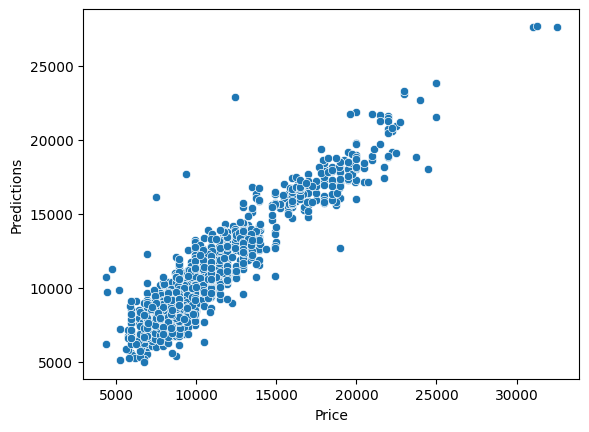

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.scatterplot(x='Price', y="Predictions", data=data)

plt.show()

### 2.4 Visualize Errors

In [10]:
df = data[['Price', 'Predictions']].sort_values(by=['Price'])
df = df.reset_index(drop=True)
df['index'] = df.index

df['Error'] = df.Price - df.Predictions
df.head()

,Price,Predictions,index,Error
0,4350,10721.596394,0,-6371.596394
1,4400,6212.547189,1,-1812.547189
2,4450,9745.042623,2,-5295.042623
3,4750,11259.750130,3,-6509.750130
4,5150,9888.173819,4,-4738.173819


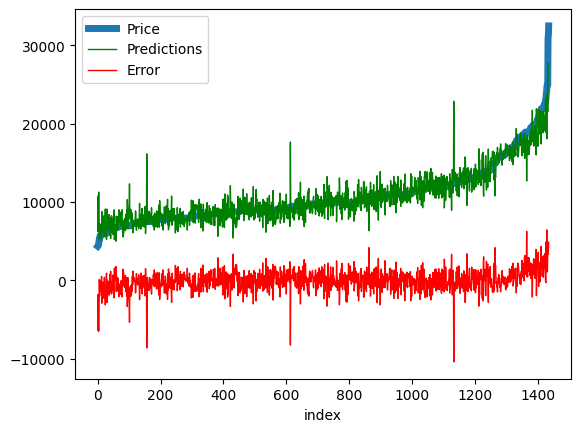

In [11]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='index',y='Price',ax=ax,linewidth=5.0)

df.plot(kind='line',x='index',y='Predictions', color='green', ax=ax, linewidth=1.0)

df.plot(kind='line',x='index',y='Error', color='red', ax=ax, linewidth=1.0)

plt.show()